# Getting Started in Machine Learning 

## Chapter 3: Polynomial Regression

This notebook contains examples from the book: 

_Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter_ (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019. 



    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.
    
    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random

# Generate a "Toy" data set

There are 11 data points


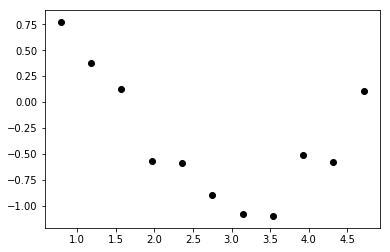

In [2]:
np.random.seed(99)
x=np.linspace(math.pi/4, 1.5*math.pi, 11)
y=np.cos(x) + .4*(np.random.random(11)-.5)
plt.scatter(x,y,c="black")
npts=len(x)
print("There are",npts,"data points")


In [3]:
pairs=[list(np.around((x,y),2)) for (x,y) in zip(x,y)]
print(list(map(tuple,pairs)))

[(0.79, 0.78), (1.18, 0.38), (1.57, 0.13), (1.96, -0.57), (2.36, -0.58), (2.75, -0.9), (3.14, -1.08), (3.53, -1.11), (3.93, -0.51), (4.32, -0.58), (4.71, 0.11)]


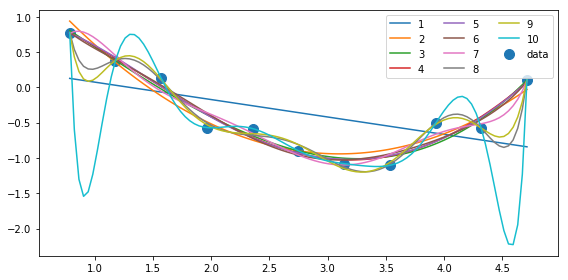

In [4]:
xplot=np.linspace(math.pi/4, 1.5*math.pi, 100)

for degree in range(1,npts):
    c=np.polyfit(x,y,degree)
    yplot=np.polyval(c,xplot)
    plt.plot(xplot,yplot,label=str(degree))
plt.scatter(x,y, label="data", s=100)
plt.legend(ncol=3)
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("Ten-Fits-to-Toy-Data.pdf")

# calculate the MSS incorrectly

0.25366193077856575
0.02516058342420293
0.0174513740678057
0.016667819941045044
0.01662983254719284
0.016175270156287395
0.013242651741512696
0.0022611454174336905
0.001977755195752324
6.680747367961377e-18


(0.001, 1)

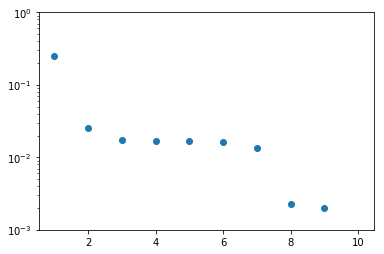

In [5]:
n=len(x)
MSSWRONG=[]
for degree in range(1,npts):
    c=np.polyfit(x,y,degree)
    yfit=np.polyval(c,x)
    MSS=sum((yfit-y)**2)/n
    MSSWRONG.append(MSS)
    print(MSS)
plt.scatter(range(1,n),MSSWRONG)
plt.yscale("log")
plt.ylim(.001,1)
#print(len(TSSWRONG),n)

## function for train_test_split

In [6]:
def train_test_split(x,y,f=.75):
    # Force between 10 and 90 percent training data
    f=max(.1, min(f,.9))
    # shuffle the indices of the original data
    n=len(x)
    ntrain=round(f*n)
    indices=list(range(n))
    random.shuffle(indices)
    ind_train=indices[:ntrain]
    ind_test=indices[ntrain:]
    XTRAIN=x[ind_train]; YTRAIN=y[ind_train]
    XTEST=x[ind_test]; YTEST=y[ind_test]
    return(XTRAIN,YTRAIN,XTEST,YTEST)

## function fitsets to loop through multiple degrees and return TSS

In [7]:
def fitsets(XTRAIN,YTRAIN,XTEST,YTEST,maxdeg):
    ntest=len(XTEST)
    results=[]
    for p in range(1,maxdeg+1):
        fit=np.polyfit(XTRAIN, YTRAIN,p)
        yfit=np.polyval(fit,XTEST)
        MSS=sum((yfit-YTEST)**2)/ntest
        results.append(MSS)
    
    return(np.array(results).T)
    

# Simulate multiple train/test splits and find a table of means and standard deviations

In [8]:
nruns=100
maxdeg=7
MSS_DAT=[]
for rz in range(nruns):
    XTR,YTR,XT,YT=train_test_split(x,y,.75)
    MSS=fitsets(XTR,YTR,XT,YT,maxdeg)
    MSS_DAT.append(list(MSS))

MSS_DAT=np.array(MSS_DAT)

means=np.mean(MSS_DAT,axis=0)
stdevs=np.std(MSS_DAT,axis=0)

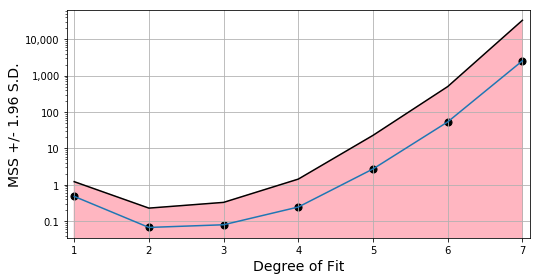

In [9]:
DOTS=range(1,maxdeg+1)
plt.plot(DOTS,means+1.96*stdevs,c="k")
plt.plot(DOTS,means-1.96*stdevs,c="k")

plt.plot(DOTS,means)

plt.xlabel("Degree of Fit",fontsize=14)
plt.ylabel("MSS +/- 1.96 S.D.",fontsize=14)
plt.fill_between(DOTS,means+1.96*stdevs,means-1.96*stdevs,color="lightpink")
plt.scatter(DOTS,means,s=50,c="k")
#plt.ylim(-10,10)
plt.yscale("log")
plt.xlim(1, 7)
plt.xticks(range(1,8));
plt.yticks([.1,1,10,100,1000,10**4],["0.1","1","10","100","1,000","10,000"])
plt.grid()
plt.xlim(.9, 7.1);
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(8,4)
#fig.savefig("toy-mean-variance-poly-fit.pdf")

### Plot results for first 3 degrees only on entire data set

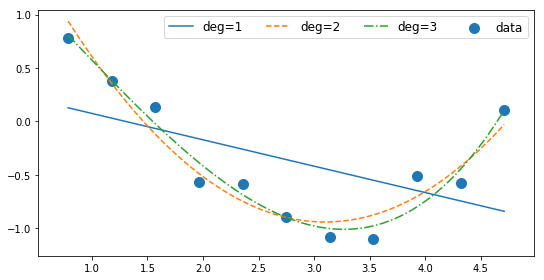

In [10]:
xplot=np.linspace(math.pi/4, 1.5*math.pi, 100)
styles=["solid","dashed","dashdot","dotted"]
for degree in range(1,4):
    c=np.polyfit(x,y,degree)
    yplot=np.polyval(c,xplot)
    plt.plot(xplot,yplot,label="deg="+str(degree),ls=styles[degree-1])
plt.scatter(x,y, label="data", s=100)
plt.legend(ncol=4,fontsize=12)
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(8,4)
#fig.savefig("toy-data-first-3-degrees-all-data-fit.pdf")

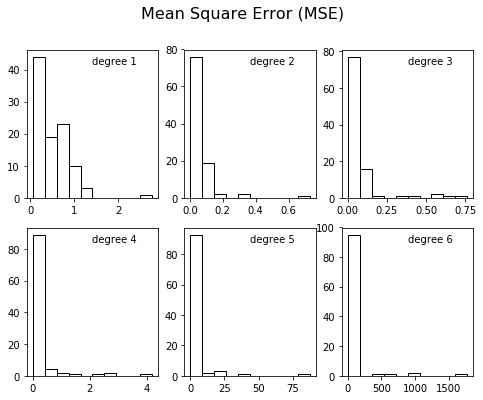

In [11]:
fig,ax=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(8,6)
fig.suptitle("Mean Square Error (MSE)",fontsize=16)
for j in range(2):
    for k in range(3):
        deg = 3*j+k
        ax[j][k].text(.5,.9,"degree "+str(deg+1), transform=ax[j][k].transAxes)
        ax[j][k].hist(MSS_DAT[:,deg],color="white",edgecolor="black")
fig.savefig("MSE-Poly-Toy-Histograms.pdf")

# Brazilian Coffee Bean Prices

In [12]:
robusta = pd.read_csv("../data/robusta.txt",sep="\t",skiprows=2)
arabica = pd.read_csv("../data/arabica.txt",sep="\t",skiprows=2)
print(robusta)
print(arabica)

        Month    2014    2015    2016    2017    2018
0     January  226.82  283.28  389.27  495.19  331.57
1    February  243.48  299.58  393.61  449.93  319.12
2       March  263.25  303.44  363.88  444.97  305.55
3       April  256.77  295.88  379.33  411.31  320.04
4         May  245.82  290.33  386.71  408.81  330.78
5        June  235.14  301.03  391.40  414.96  335.39
6        July  242.44  307.28  409.99  411.84  332.38
7      August  248.42  325.68  422.87  410.77  319.25
8   September  250.55  340.81  435.74  400.50  319.38
9     October  264.25  363.94  501.07  382.43  338.32
10   November  277.02  375.25  521.31  365.36    0.00
11   December  277.14  378.98  487.60  362.30    0.00
        Month    2014    2015    2016    2017    2018
0     January  289.44  465.92  491.31  514.23  446.42
1    February  366.32  459.99  489.82  508.65  438.32
2       March  437.24  447.10  491.06  485.92  429.81
3       April  449.45  445.69  466.71  467.63  430.71
4         May  429.28  421.9

Prices are per 60 kg bag; divide by 60 to get price per kg

In [13]:
years=list(robusta.columns)[1:]
robusta_prices=np.hstack([list(robusta[year]) for year in years])[:-2]/60

years=list(arabica.columns)[1:]
arabica_prices=np.hstack([list(arabica[year]) for year in years])[:-2]/60

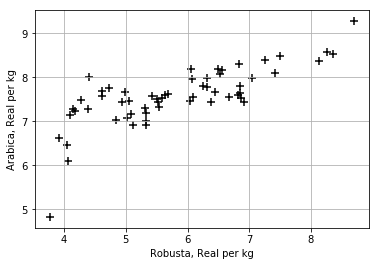

In [14]:
n=len(arabica_prices)
xmon=list(range(n))
plt.scatter(robusta_prices,arabica_prices,c="k",s=50,marker="+")
plt.xlabel("Robusta, Real per kg")
plt.ylabel("Arabica, Real per kg")
plt.grid()
fig=plt.gcf()
#fig.savefig("Coffee-Bean-Raw-Unfit-Data.pdf")

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y=np.array(arabica_prices)
x=np.array(robusta_prices)

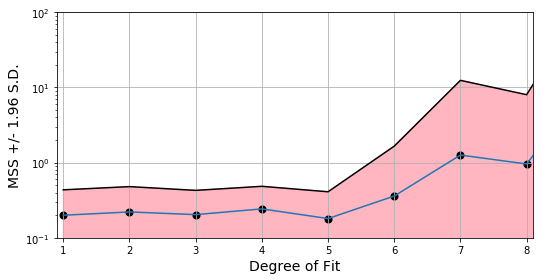

In [17]:
nruns=200
maxdeg=9
MSSes=[]
for rz in range(nruns):
    XTR,XT,YTR,YT=train_test_split(x,y)
    results=np.array(fitsets(XTR,YTR,XT,YT,maxdeg)).T
    MSSes.append(list(results))
MSSes=np.array(MSSes)
means=np.mean(MSSes,axis=0)
stdevs=np.std(MSSes,axis=0)
DOTS=range(1,maxdeg+1)
plt.plot(DOTS,means)

plt.plot(DOTS,means+1.96*stdevs,c="k")
plt.plot(DOTS,means-1.96*stdevs,c="k")
plt.xlabel("Degree of Fit", fontsize=14)
plt.ylabel("MSS +/- 1.96 S.D.",fontsize=14)
plt.fill_between(DOTS,means+1.96*stdevs,means-1.96*stdevs,color="lightpink")
plt.scatter(DOTS,means,s=50,c="k")
plt.xlim(.9, 8.1);
plt.grid()
plt.yticks([.1,1,10,100],["0.1","1","10","100"])
plt.yscale("log")
plt.ylim(.1,100)
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(8,4)
#fig.savefig("brazil-coffee-MSS.pdf")

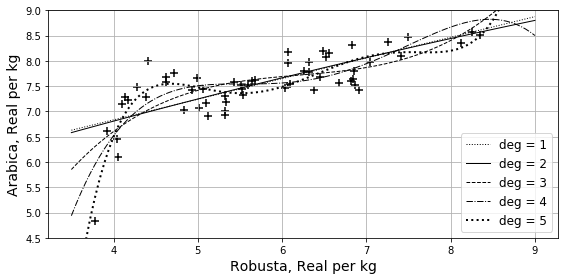

In [18]:
xvals=np.linspace(3.5,9,100)
plt.scatter(x,y,marker="+",s=50,color="k")
maxdeg=7
linestyles=[":","-","--","-.",":"]
for degree in range(1,6):
    c=np.polyfit(x,y,degree)
    yvals=np.polyval(c,xvals)
    plt.plot(xvals,yvals,ls=linestyles[degree-1],
             c="k",label="deg = "+str(degree),
            lw=1 if degree <5 else 2)
plt.ylim(4.5,9)
plt.legend(loc="lower right",fontsize=12)
plt.xlabel("Robusta, Real per kg",fontsize=14)
plt.ylabel("Arabica, Real per kg",fontsize=14)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("brazil-coffee-fits.pdf")

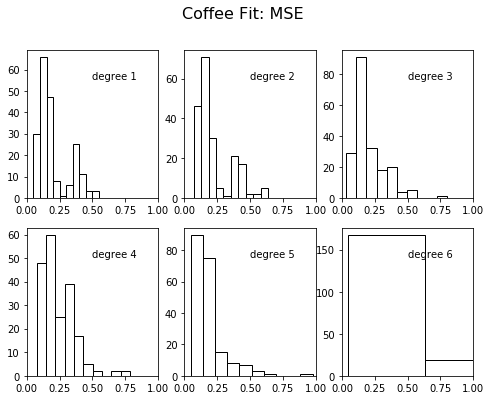

In [19]:
fig,ax=plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(8,6)
fig.suptitle("Coffee Fit: MSE",fontsize=16)
for row in range(2):
    for col in range(3):
        j=3*row+col
        ax[row][col].text(.5,.8,"degree "+str(j+1), transform=ax[row][col].transAxes)
        ax[row][col].hist(MSSes[:,j], color="white",edgecolor="k")     
        ax[row][col].set_xlim(0,1)
#fig.savefig("coffee-polynomial-MSE-histogram.pdf")